# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/2322/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

pd.set_option('expand_frame_repr', True)
pd.set_option('max_colwidth', 2000)

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head(5)

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
# Show df_content to get an idea of the data
df_content.head(5)

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,"Skip navigation Sign in SearchLoading...\r\n\r\nClose Yeah, keep it Undo CloseTHIS VIDEO IS UNAVAILABLE.\r\nWATCH QUEUE\r\nQUEUE\r\nWatch Queue Queue * Remove all\r\n * Disconnect\r\n\r\nThe next video is starting stop 1. Loading...\r\n\r\nWatch Queue Queue __count__/__total__ Find out why CloseDEMO: DETECT MALFUNCTIONING IOT SENSORS WITH STREAMING ANALYTICS\r\nIBM AnalyticsLoading...\r\n\r\nUnsubscribe from IBM Analytics? Cancel UnsubscribeWorking...\r\n\r\nSubscribe Subscribed Unsubscribe 26KLoading...\r\n\r\nLoading...\r\n\r\nWorking...\r\n\r\nAdd toWANT TO WATCH THIS AGAIN LATER?\r\nSign in to add this video to a playlist. Sign in Share More * ReportNEED TO REPORT THE VIDEO?\r\n Sign in to report inappropriate content. Sign in\r\n * Transcript\r\n * Statistics\r\n * Add translations\r\n\r\n175 views 6LIKE THIS VIDEO?\r\nSign in to make your opinion count. Sign in 7 0DON'T LIKE THIS VIDEO?\r\nSign in to make your opinion count. Sign in 1Loading...\r\n\r\nLoading...\r\n\r\nTRANSCRIPT\r\nThe interactive transcript could not be loaded.Loading...\r\n\r\nLoading...\r\n\r\nRating is available when the video has been rented. This feature is not available right now. Please try again later. Published on Nov 6, 2017This video demonstrates a Streaming Analytics application written in Python\r\nrunning in the IBM Data Science experience. The results of the analysis are\r\ndisplayed on a map using Plotly.\r\n\r\nThe notebook demonstrated in this video is available for you to try: http://ibm.biz/WeatherNotebook\r\n\r\nVisit Streamsdev for more articles and tips about Streams: https://developer.ibm.com/streamsdev\r\n\r\nPython API Developer guide: http://ibmstreams.github.io/streamsx....\r\n\r\nStreaming Analytics in Python course: https://developer.ibm.com/courses/all...\r\n\r\n * CATEGORY\r\n * Science & Technology\r\n \r\n \r\n * LICENSE\r\n * Standard YouTube License\r\n \r\n \r\n\r\nShow more Show lessLoading...\r\n\r\nAutoplay When autoplay is enabled,...",Detect bad readings in real time using Python and Streaming Analytics.,Detect Malfunctioning IoT Sensors with Streaming Analytics,Live,0
1,"No Free Hunch Navigation * kaggle.com\r\n\r\n * kaggle.com\r\n\r\nCommunicating data science: A guide to presenting your work 4COMMUNICATING DATA SCIENCE: A GUIDE TO PRESENTING YOUR WORK\r\nMegan Risdal | 06.29.2016\r\n\r\nSee the forest, see the trees . Here lies the challenge in both performing and presenting an analysis. As\r\ndata scientists, analysts, and machine learning engineers faced with fulfilling\r\nbusiness objectives, we find ourselves bridging the gap between The Two Cultures : sciences and humanities. After spending countless hours at the terminal\r\ndevising a creative and elegant solution to a difficult problem, the insights\r\nand business applications are obvious in our minds. But how do you distill them\r\ninto something you can communicate?\r\n\r\nQualifications and requirements for a senior data scientist position.\r\n\r\nPresenting my work is one of the surprising challenges I faced in my recent\r\ntransition from academia to life as a data analyst at a market research and strategy firm . When I was a linguistics PhD student at UCLA studying learnability theory in\r\na classroom or measuring effects of an oral constriction on glottal vibration in\r\na sound booth, my colleagues and I were comfortable speaking the same language.\r\nNow that I work with a much more diverse crowd of co-workers and clients with\r\nvaried backgrounds and types of expertise, I need to work harder to ensure that\r\nthe insights of my analyses are communicated effectively.\r\n\r\nIn this second entry in the communicating data science series , I cover some essentials when it comes to presenting a thorough,\r\ncomprehensible analysis for readers who want (or need) to know how to get their\r\nwork noticed and read.\r\n\r\n\r\n----------------------------------------------------------

### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [3]:
df_content.shape

(1056, 5)

In [4]:
df.shape

(45993, 3)

In [5]:
# the number of times each user interacts with an article
df['email'].value_counts().describe()

count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: email, dtype: float64

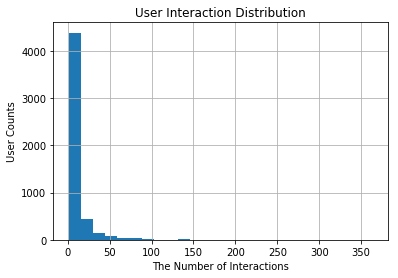

In [6]:
# Visualization
df['email'].value_counts().hist(bins=25)
plt.title('User Interaction Distribution')
plt.xlabel('The Number of Interactions')
plt.ylabel('User Counts')
plt.show()

In [7]:
# Fill in the median and maximum number of user_article interactios below
median_val = 3 # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user = 364 # The maximum number of user-article interactions by any 1 user is ______.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [8]:
# Find and explore duplicate articles
df_content[df_content['article_id'].duplicated()]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,"Follow Sign in / Sign up Home About Insight Data Science Data Engineering Health Data AI 5 * Share\r\n * 5\r\n * \r\n * \r\n\r\nNever miss a story from Insight Data , when you sign up for Medium. Learn more Never miss a story from Insight Data Get updates Get updates Sebastien Dery Blocked Unblock Follow Following Master of Layers, Protector of the Graph, Wielder of Knowledge. #OpenScience\r\n#NoBullshit 2 days ago\r\n--------------------------------------------------------------------------------\r\n\r\nGRAPH-BASED MACHINE LEARNING: PART 2\r\nCOMMUNITY DETECTION AT SCALE\r\nDuring the seven-week Insight Data Engineering Fellows Program recent grads and experienced software engineers learn the latest open source technologies by building a data platform to handle large, real-time datasets.\r\n\r\nSebastien Dery (now a Data Science Engineer at Yewno ) discusses his project on community detection on large datasets.\r\n\r\n\r\n--------------------------------------------------------------------------------\r\n\r\n#tltr : Graph-based machine learning is a powerful tool that can easily be merged\r\ninto ongoing efforts. This work reviews the feasibility of performing community\r\ndetection through a distributed implementation using GraphX. Embedded within the\r\nHadoop ecosystem, this modularity optimization approach allows the study of\r\nnetworks of unprecedented size. This change of scales, previously limited by\r\nRAM, opens exciting perspectives as the self modular structure of complex\r\nsystems have been shown to hold crucial information to understanding their\r\nnature.In my previous post , we discussed the foundation of community detection using modularity\r\noptimization. One major constraint however, is that your graph needs to fit in\r\nmemory. This quickly turns problematic as your number of nodes surpass billions, and\r\nthe number of edges becomes trillions.\r\n\r\nThankfully we can leverage distributed computation systems in order to solve this limitat...",During the seven-week Insight Data Engineering Fellows Program recent grads and experienced software engineers learn the latest open source technologies by building a data platform to handle large…,Graph-based machine learning,Live,50
692,"Homepage Follow Sign in / Sign up Homepage * Home\r\n * Data Science Experience\r\n * Data Catalog\r\n * \r\n * Watson Data Platform\r\n * \r\n\r\nSusanna Tai Blocked Unblock Follow Following Offering Manager, Watson Data Platform | Data Catalog Oct 30\r\n--------------------------------------------------------------------------------\r\n\r\nHOW SMART CATALOGS CAN TURN THE BIG DATA FLOOD INTO AN OCEAN OF OPPORTUNITY\r\nOne of the earliest documented catalogs was compiled at the great library of\r\nAlexandria in the third century BC, to help scholars manage, understand and\r\naccess its vast collection of literature. While that cataloging process\r\nrepresented a massive undertaking for the Alexandrian librarians, it pales in\r\ncomparison to the task of wrangling the volume and variety of data that modern\r\norganizations generate.\r\n\r\nNowadays, data is often described as an organization’s most valuable asset, but\r\nunless users can easily sift through data artifacts to find the information they\r\nneed, the value of that data may remain unrealized. Catalogs can solve this\r\nproblem by providing an indexed set of information about the organization’s\r\ndata, storing metadata that describes all assets and providing a reference to\r\nwhere they can be found or accessed.\r\n\r\nIt’s not just the size and complexity of the data that makes cataloging a tough\r\nchallenge: organizations also need to be able to perform increasingly\r\ncomplicated operations on that data at high speed, and even in real-time. As a\r\nresult, technology leaders must continually find better ways to solve today’s\r\nversion of the same cataloging challenges faced in Alexandria all those 

In [9]:
# Remove any rows that have the same article_id - only keep the first
df_content.drop_duplicates(subset='article_id', inplace = True)
df_content.shape

(1051, 5)

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [10]:
# The number of unique articles that have at least one interaction
df['article_id'].unique().shape

(714,)

In [11]:
# The number of unique articles on the IBM platform
df_content['article_id'].unique().shape

(1051,)

In [12]:
# The number of unique users
df['email'].unique().shape

(5149,)

In [13]:
df['email'].value_counts().describe()

count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: email, dtype: float64

In [14]:
# The number of user-article interactions
df.shape

(45993, 3)

In [15]:
unique_articles = 714 # The number of unique articles that have at least one interaction
total_articles = 1051 # The number of unique articles on the IBM platform
unique_users = 5148 # The number of unique users
user_article_interactions = 45993 # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [16]:
df['article_id'].value_counts().max()

937

In [17]:
df['article_id'].value_counts()[df['article_id'].value_counts()==937]

1429.0    937
Name: article_id, dtype: int64

In [18]:
most_viewed_article_id = '1429.0'  # The most viewed article in the dataset as a string with one value following the decimal 
max_views =  937   # The most viewed article in the dataset was viewed how many times?

In [19]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [20]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [21]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    top_articles_df = df[df['article_id'].isin(list(df['article_id'].value_counts().head(n).index))]
    top_articles = top_articles_df['title'].unique()
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    top_articles = df['article_id'].value_counts().head(n).index
 
    return top_articles # Return the top article ids

In [22]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['healthcare python streaming application demo'
 'use deep learning for image classification'
 'apache spark lab, part 1: basic concepts'
 'predicting churn with the spss random tree algorithm'
 'analyze energy consumption in buildings' 'visualize car data with brunel'
 'use xgboost, scikit-learn & ibm watson machine learning apis'
 'gosales transactions for logistic regression model'
 'insights from new york car accident reports'
 'finding optimal locations of new store using decision optimization']
Float64Index([1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0,
              1162.0, 1304.0],
             dtype='float64')


In [23]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [24]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    user_item = df.groupby(['user_id', 'article_id'])['title'].count().notnull().unstack()
    user_item = user_item.notnull().astype(np.int)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [25]:
user_item.head(5)

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
user_item.shape

(5149, 714)

In [27]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [28]:
user_item.iloc[1]

article_id
0.0       0
2.0       0
4.0       0
8.0       0
9.0       0
12.0      0
14.0      0
15.0      0
16.0      0
18.0      0
20.0      0
25.0      0
26.0      0
28.0      0
29.0      0
30.0      0
32.0      0
33.0      0
34.0      0
36.0      0
39.0      0
40.0      0
43.0      0
48.0      0
50.0      0
51.0      0
53.0      0
54.0      0
57.0      0
58.0      0
         ..
1412.0    0
1414.0    0
1415.0    0
1416.0    0
1418.0    0
1419.0    0
1420.0    0
1421.0    0
1422.0    1
1423.0    0
1424.0    0
1425.0    0
1426.0    0
1427.0    1
1428.0    0
1429.0    0
1430.0    0
1431.0    0
1432.0    0
1433.0    0
1434.0    0
1435.0    0
1436.0    0
1437.0    0
1439.0    0
1440.0    0
1441.0    0
1442.0    0
1443.0    0
1444.0    0
Name: 2, Length: 714, dtype: int64

In [29]:
np.matmul(user_item.iloc[1], np.transpose(user_item))
haha = pd.Series(data = np.matmul(user_item.iloc[1], np.transpose(user_item)), index = user_item.index  )
x = haha.sort_values(ascending=False)
x = x[x!=0]
x

user_id
2       6
3764    5
49      5
98      5
3697    5
10      4
2982    4
21      4
3782    4
290     4
4785    4
3354    4
23      4
3684    4
5083    4
38      4
273     3
4061    3
346     3
262     3
51      3
4098    3
2790    3
3169    3
58      3
3414    3
4778    3
322     3
3082    3
912     3
       ..
2572    1
3616    1
4720    1
2176    1
3614    1
365     1
5078    1
352     1
1281    1
3602    1
2180    1
3625    1
2597    1
3300    1
56      1
2595    1
5064    1
347     1
4685    1
2579    1
4725    1
4711    1
5052    1
4689    1
364     1
3301    1
5057    1
67      1
3314    1
348     1
Length: 857, dtype: int64

In [30]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    similarity = pd.Series(data = np.matmul(user_item.iloc[user_id], np.transpose(user_item)), index = user_item.index )

    # sort by similarity
    # create list of just the ids
    similarity_sorted = similarity.sort_values(ascending=False).index
    
    # remove the own user's id
    most_similar_users = similarity_sorted.drop(user_id)
    most_similar_users = most_similar_users[most_similar_users!=0]
       
    return most_similar_users # return a list of the users in order from most to least similar
        

In [31]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: Int64Index([2, 3764, 49, 98, 3697, 10, 2982, 21, 3782, 290], dtype='int64', name='user_id')
The 5 most similar users to user 3933 are: Int64Index([3934, 49, 126, 2742, 1062], dtype='int64', name='user_id')
The 3 most similar users to user 46 are: Int64Index([4527, 120, 3419], dtype='int64', name='user_id')


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [32]:
user_item.loc[1]==1

article_id
0.0       False
2.0       False
4.0       False
8.0       False
9.0       False
12.0      False
14.0      False
15.0      False
16.0      False
18.0      False
20.0      False
25.0      False
26.0      False
28.0      False
29.0      False
30.0      False
32.0      False
33.0      False
34.0      False
36.0      False
39.0      False
40.0      False
43.0       True
48.0      False
50.0      False
51.0      False
53.0      False
54.0      False
57.0      False
58.0      False
          ...  
1412.0    False
1414.0    False
1415.0    False
1416.0    False
1418.0    False
1419.0    False
1420.0    False
1421.0    False
1422.0    False
1423.0    False
1424.0    False
1425.0    False
1426.0    False
1427.0     True
1428.0    False
1429.0     True
1430.0     True
1431.0     True
1432.0    False
1433.0    False
1434.0    False
1435.0    False
1436.0     True
1437.0    False
1439.0     True
1440.0    False
1441.0    False
1442.0    False
1443.0    False
1444.0    False
Name: 1, Leng

In [33]:
user_item.loc[1][user_item.loc[1]==1]

article_id
43.0      1
109.0     1
151.0     1
268.0     1
310.0     1
329.0     1
346.0     1
390.0     1
494.0     1
525.0     1
585.0     1
626.0     1
668.0     1
732.0     1
768.0     1
910.0     1
968.0     1
981.0     1
1052.0    1
1170.0    1
1183.0    1
1185.0    1
1232.0    1
1293.0    1
1305.0    1
1363.0    1
1368.0    1
1391.0    1
1400.0    1
1406.0    1
1427.0    1
1429.0    1
1430.0    1
1431.0    1
1436.0    1
1439.0    1
Name: 1, dtype: int64

In [34]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names = df[df['article_id'].isin(article_ids)]['title']
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    article_ids = list(set(np.array(user_item.loc[user_id][user_item.loc[user_id]==1].index).astype(str)))
    
    article_names = list(set(get_article_names(article_ids).unique()))
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    # recomend users with rank
    user_rec = find_similar_users(user_id)
    article_ids_list = []
    article_names_list = []
    
    user_own_article_ids, user_own_article_names = get_user_articles(user_id)
    #print(user_own_article_names)
    i = 0
    while i<len(user_rec):
        article_ids, article_names = get_user_articles(user_rec[i])
        
        article_ids_list = list(set(article_ids_list + article_ids).difference(set(user_own_article_ids)))
        article_names_list = list(set(article_names_list + article_names).difference(set(user_own_article_names)))

        #print(article_names_list)
        
        if len(article_ids_list)>m:
            break
        i = i+1
    recs = article_names_list[:m]
    print(recs)
    return recs # return your recommendations for this user_id    

In [35]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['flightpredict ii: the sequel  – ibm watson data lab', 'get social with your notebooks in dsx', 'predicting churn with the spss random tree algorithm', 'how open api economy accelerates the growth of big data and analytics', 'analyze open data sets using pandas in a python notebook', 'healthcare python streaming application demo', 'machine learning and the science of choosing', 'data tidying in data science experience', 'random forest interpretation – conditional feature contributions', 'python machine learning: scikit-learn tutorial']


Series([], Name: title, dtype: object)

In [36]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [37]:
df.head(5)

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier data analysis and experimentation",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [38]:
user_item.head(5)

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.groupby(['user_id'])['article_id'].count()

user_id
1        47
2         6
3        82
4        45
5         5
6        19
7         4
8        82
9        32
10       22
11       35
12       13
13       21
14       28
15       17
16        3
17       35
18        3
19        8
20        3
21      137
22       37
23      364
24       30
25       10
26       27
27       34
28       42
29        1
30        5
       ... 
5120      1
5121      1
5122      1
5123     13
5124     22
5125      1
5126      2
5127     29
5128      4
5129     29
5130      1
5131      1
5132      2
5133      3
5134      9
5135      3
5136      2
5137      2
5138     95
5139     13
5140    101
5141      1
5142      2
5143     25
5144      1
5145      6
5146      9
5147      1
5148      1
5149      1
Name: article_id, Length: 5149, dtype: int64

In [40]:
def find_similar_and_users(user_id_int, user_item=user_item):
    '''
    INPUT:
    user_id_int - (int) a user_id_int
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    most_similar_users - (list) an ordered list where the closest users (largest dot product users)
                         are listed first
    most_similar_values - (list) an ordered list where the closest values (largest dot product users)
                       are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    similarity = pd.Series(data = np.matmul(user_item.iloc[user_id_int], np.transpose(user_item)), index = user_item.index )

    # sort by similarity
    # create list of just the ids
    similarity_sorted = similarity.sort_values(ascending=False)
    
    # remove the own user's id
    most_similar = similarity_sorted[similarity_sorted!=0]
    #print(len(most_similar))
    try:
        most_similar = most_similar.drop(user_id_int)
    except:
        most_similar = most_similar
    
    most_similar_users = most_similar.index
    most_similar_values = most_similar.tolist()
    
    #print(len(most_similar_users), len(most_similar_values))
       
    return most_similar_users, most_similar_values # return a list of the users in order from most to least similar
        
def get_top_sorted_users(user_id_int, df=df, user_item=user_item):
    '''
    INPUT:
    user_id_int - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id_int
                    similarity - measure of the similarity of each user to the provided user_id_int
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    neighbor_id, similarity = find_similar_and_users(user_id_int)
    num_interactions = user_item.loc[neighbor_id].sum(axis=1)
    #print(num_interactions)
    #print(len(neighbor_id), len(similarity), len(num_interactions))

    neighbors_df = pd.DataFrame()
    neighbors_df['neighbor_id'] = neighbor_id
    neighbors_df['similarity'] = similarity
    neighbors_df['num_interactions'] = num_interactions.values
    #print(num_interactions.values)
    
    neighbors_df = neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=False)    #Sorting values by two columns

    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    neighbors_df = get_top_sorted_users(user_id)
    
    article_ids_list = []
    article_names_list = []
    
    user_own_article_ids, user_own_article_names = get_user_articles(user_id)
    #print(user_own_article_names)
    
    i = 0
    while i<len(neighbors_df):
        article_ids, article_names = get_user_articles(neighbors_df['neighbor_id'][i])
        
        article_ids_list = list(set(article_ids_list + article_ids).difference(set(user_own_article_ids)))
        article_names_list = list(set(article_names_list + article_names).difference(set(user_own_article_names)))

        #print(article_names_list)
        
        if len(article_ids_list)>m:
            break
        i = i+1
    recs = article_ids_list[:m]
    rec_names = article_names_list[:m]
    #print(recs)
    
    return recs, rec_names

In [41]:
get_top_sorted_users(1)

,neighbor_id,similarity,num_interactions
0,2,6,6
2,49,5,101
4,3697,5,100
1,3764,5,97
3,98,5,97
8,3782,4,135
12,23,4,135
10,4785,4,62
7,21,4,61
6,2982,4,58


In [42]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['349.0', '1330.0', '641.0', '1314.0', '116.0', '465.0', '813.0', '1332.0', '1395.0', '1436.0']

The top 10 recommendations for user 20 are the following article names:
['maximize oil company profits', 'breast cancer wisconsin (diagnostic) data set', 'build a python app on the streaming analytics service', 'insights from new york car accident reports', 'practical tutorial on random forest and parameter tuning in r', 'modern machine learning algorithms', 'this week in data science (april 11, 2017)', 'how smart catalogs can turn the big data flood into an ocean of opportunity', 'watson machine learning for developers', 'apache spark lab, part 2: querying data']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [43]:
get_top_sorted_users(0).head(5)

,neighbor_id,similarity,num_interactions
0,1,36,36
1,3933,35,35
2,23,17,135
3,3782,17,135
4,203,15,96


In [44]:
get_top_sorted_users(130).head(15)

,neighbor_id,similarity,num_interactions
0,131,75,75
1,3870,74,75
2,3782,39,135
3,23,38,135
4,4459,33,96
5,203,33,96
9,49,29,101
8,3697,29,100
6,98,29,97
7,3764,29,97


In [45]:
### Tests with a dictionary of results

user1_most_sim = 3933 # Find the user that is most similar to user 1 
user131_10th_sim = 242 # Find the 10th most similar user to user 131

In [46]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Provide your response here.**

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [47]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10).astype(str) # Your recommendations here
new_user_recs


Index(['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0',
       '1170.0', '1162.0', '1304.0'],
      dtype='object')

In [48]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [49]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [50]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [51]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [52]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [53]:
# Perform SVD on the User-Item Matrix Here

u, s, vt =  np.linalg.svd(user_item_matrix, full_matrices=False) # use the built in to get the three matrices
u.shape, s.shape, vt.shape

((5149, 714), (714,), (714, 714))

In [54]:
user_item_matrix.isna().sum().sum()

0

Answer:

There is no missing value in the dataframe, thus we can use the SVD directly.

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

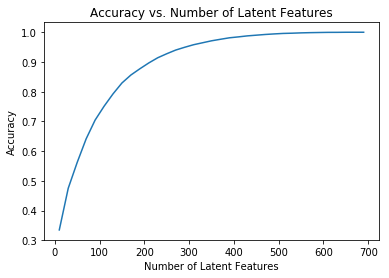

In [55]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [56]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_item_matrix(df_train)
    
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = list(set(user_item_test.index))
    test_arts = list(set(user_item_test.columns))
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [57]:
# How many users can we make predictions for in the test set?
len(set(user_item_test.index).intersection(user_item_train.index))

20

In [58]:
# How many users in the test set are we not able to make predictions for because of the cold start problem?
len(set(user_item_test.index).difference(set(user_item_train.index)))

662

In [59]:
# How many articles can we make predictions for in the test set?
len( set(user_item_test.columns) & set(user_item_train.columns) )

574

In [60]:
# How many articles in the test set are we not able to make predictions for because of the cold start problem?
len( set(user_item_test.columns) - set(user_item_train.columns) )

0

In [61]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a,  
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d 
}

t.sol_4_test(sol_4_dict)

KeyError: 'How many movies can we make predictions for in the test set?'

`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [62]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train, full_matrices=False) # fit svd similar to above then use the cells below
u_train.shape, s_train.shape, vt_train.shape

((4487, 714), (714,), (714, 714))

In [63]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data

In [64]:
user_item_train.head(5)

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
user_item_test.head(5)

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1432.0,1433.0,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1443.0
user_id,,,,,,,,,,,,,,,,,,,,,
2917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3024,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# make sure that the row index (user id) for testing is in the training set
# make sure that the column id (article id) for testing is in the training set.
# thus the problem won't be a cold start problem.

row_idxs = user_item_train.index.isin(test_idx)
col_idxs = user_item_train.columns.isin(test_arts)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]

In [73]:
u_test.shape, vt_test.shape

((20, 714), (714, 574))

In [87]:
# you can predict using this matrix decomposition with different numbers of latent features 
# to see how many features makes sense to keep based on the accuracy on the test data.
num_latent_feats = np.arange(5,714,20)
sum_errs_train = []
sum_errs_test = []
all_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    user_item_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    
    all_errs.append(1 - ((np.sum(user_item_test_preds)+np.sum(np.sum(user_item_test)))/(user_item_test.shape[0]*user_item_test.shape[1])))
    
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_train_preds)
    test_inx = list(set(user_item_test.index).intersection(user_item_train.index))
    diffs_test = np.subtract(user_item_test.loc[test_inx], user_item_test_preds)
    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    
    sum_errs_train.append(err_train)
    sum_errs_test.append(err_test)

In [88]:
acc_train = 1 - np.array(sum_errs_train)/(user_item_train.shape[0]*user_item_test.shape[1])
acc_test = 1 - np.array(sum_errs_test)/(user_item_test.shape[0]*user_item_test.shape[1])
acc_toterror = all_errs

Text(0.5,1,'SVD Perfomance')

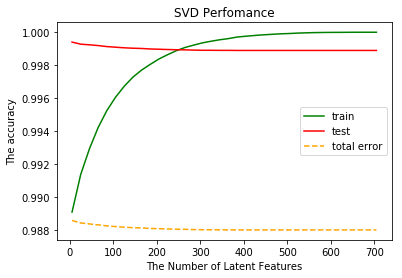

In [99]:
plt.plot(num_latent_feats, acc_train, 'g-' ,label="train")
plt.plot(num_latent_feats, acc_test, 'r-' ,label="test")
plt.plot(num_latent_feats, acc_toterror,'--', color='orange',label="total error")
plt.legend()
plt.xlabel("The Number of Latent Features")
plt.ylabel("The accuracy")
plt.title("SVD Perfomance")

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

As number of latent feature increase, the accuracy for training data increases, but decreases for testing data. Latent feature number more than 200 may not improve th

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])